## Business Understanding
  
Finding accommodation for tourists has been made with Airbnb. Airbnb offers various property type like Apartment ,
House, Boats for bookings. Seattle city attracts lots of travelers around the world throughout the year. 
Seattle Airbnb data  provides lots of insights on how the accommodation listings are booked . 
I have looked into the available data and tried to come up with insights , which might help future travelers to decide
best time to visit , the city and the apartment type by answering following questions.

1. How many listings are available for booking for each month of the year?
2. What neighborhood listings are being booked most?
3. How the apartment type and total number the listing can accommodate have impact on booking?

## Data Understanding

Importing Library

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Data

In [94]:
df = pd.read_csv('./calendar.csv')


## Data Preparation

In [95]:
# stores data frame only if value of available is not f
df = df[df.available == 't']

#split the date column to colum day , month and year
df[["year", "month", "day"]] = df["date"].str.split("-", expand = True)

In [96]:
#function to plot series

def visualize( series, plottype,title,xlabel,ylabel ):
     """Function to take series and plot the series with title , labelled x and y axis
                
        Args:
            series (series): series to plot
            plottype(string): type of chart to plot (eg. bar)
            title(string): plot title
            xlabel(string): label to be used for x axis
            ylabel(string): label to be used for y axis
        
        Returns:
            None
        
    """
     series.plot(kind= plottype)
     plt.title(title)
     plt.xlabel(xlabel)
     plt.ylabel(ylabel)

## Data Analysis

### Question 1

**1.** How many listings are available for booking for each month of the year?


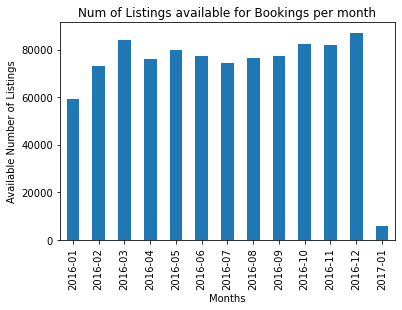

In [97]:
#plot to see which month of the year most listings are made available for booking
df[["year-month"]]=df["year"].map(str)+"-"+df["month"].map(str)
series= df.groupby('year-month')['available'].count()

visualize( series, 'bar',"Num of Listings available for Bookings per month","Months","Available Number of Listings" )

Looking at the visualization, it can be said that March and December are the month where most of the listings 
are made available. Looks like October and November are the months with next most available listings. 
As the last quarter of the year seems to have most listings available , travelers can plan in advance and 
hopefully this helps them for better planning and booking transport to and accommodations in Seattle

### Question 2

**2. ** What neighbourhood listings are being booked most? 


In [98]:
listings_df = pd.read_csv('./listings.csv')
#to find number of records in the datset
listings_df.shape

(3818, 92)

from above output , it can be seen that listing dataset has 3818 rows with 92 features

In [99]:
#to find number of records  where there exists no value for column "neighbourhood" in the datset
print(listings_df['neighbourhood'].isnull().sum())

416


In [100]:
#As there are 2 more columns related to neighbourhood , lets check for count of null values in those columns
#checking for blank values in column neighbourhood_cleansed
print(listings_df['neighbourhood_cleansed'].isnull().sum())

0


based on result obtained , it seems neighbourhood_cleansed column can be used 
compared to neighbourhood as there is no missing values in neighbourhood_cleansed

In [101]:
#to find number of records  where there exists no value for column "reviews_per_month" in the datset
print(listings_df['reviews_per_month'].isnull().sum())

627


based on result obtained , it seems  there are 627 values missing for column reviews_per_month. reviews_per_month values are 
numeric  and hence planning to impute the values with mean value obtained when records are grouped by neighbourhood_cleansed

In [102]:
# calculated and print the mean value for reviews_per_month per neighbourhood_cleansed
print(listings_df.groupby('neighbourhood_cleansed')['reviews_per_month'].mean())


neighbourhood_cleansed
Adams               2.550702
Alki                1.736552
Arbor Heights       1.030000
Atlantic            2.280698
Belltown            1.986108
                      ...   
West Woodland       2.780370
Westlake            1.712000
Whittier Heights    2.879167
Windermere          1.103750
Yesler Terrace      2.060625
Name: reviews_per_month, Length: 87, dtype: float64


In [103]:
#as we decided to impute with mean values for null values in column reviews_per_month, 
#looping in each row and impting with mean per neighbourhood_cleansed
for k in listings_df:
    listings_df['reviews_per_month'] = listings_df['reviews_per_month'].fillna(listings_df.groupby('neighbourhood_cleansed')['reviews_per_month'].transform('mean'))
    

In [104]:
#checking if there still exists any null values for reviews_per_month
#as we have already imputed , there should be no null values
print(listings_df['reviews_per_month'].isnull().sum())

0


printed output value 0 shows that there exists no null value

In [105]:
#checking mean value again now when grouped by neighbourhood_cleansed
#expect the values to be same as before as mean values itself was added to missing values
print(listings_df.groupby('neighbourhood_cleansed')['reviews_per_month'].mean())

neighbourhood_cleansed
Adams               2.550702
Alki                1.736552
Arbor Heights       1.030000
Atlantic            2.280698
Belltown            1.986108
                      ...   
West Woodland       2.780370
Westlake            1.712000
Whittier Heights    2.879167
Windermere          1.103750
Yesler Terrace      2.060625
Name: reviews_per_month, Length: 87, dtype: float64


comparing the mean values before and after imputing , its clear that mean values did not change and 
hence can be said that missing values are correctly imputed with mean values

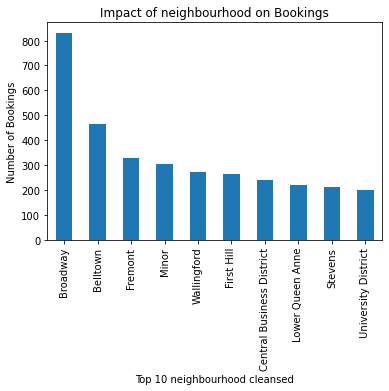

In [106]:
#plot to see neighbour hood with most review - indirectly means more bookings
series= listings_df.groupby('neighbourhood_cleansed')['reviews_per_month'].sum().sort_values(ascending=False)[:10]

visualize( series, 'bar','Impact of neighbourhood on Bookings','Top 10 neighbourhood cleansed','Number of Bookings')

Looking at visualization plot , it can be said that Broadway neighborhood cleansed in the Seattle are heavily booked 
followed by Belltown. Other neighborhood cleansed listings are relatively lesser . 
Suggest travelers to top 10 neighborhood to plan very well in advance due to heavy bookings . 
Other neighborhood though offers quite good number of listings and hopefully slight easily available for bookings.

### Question 3

**3. ** How the listing apartment type and total number the listing can accomodate have impact
on booking? 


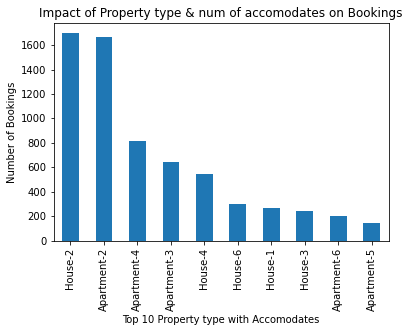

In [107]:

#plot to see what property types with number of accomodates are being more booked
listings_df[["property_type-accommodates"]]=listings_df["property_type"].map(str)+"-"+listings_df["accommodates"].map(str)
series= listings_df.groupby('property_type-accommodates')['reviews_per_month'].sum().sort_values(ascending=False)[:10]

visualize( series, 'bar','Impact of Property type & num of accomodates on Bookings','Top 10 Property type with Accomodates','Number of Bookings')

Looking at above visualization plot , it can be said that House and Apartment which can accommodates only 2 person
are in very much demand compared to other property type House and Apartments.